## Sub-task 1

### Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

### Import datset and EDA

In [2]:
df = pd.read_csv('ecommerce.csv', header=None)
df.head()

,0,1,2,3,4
0,-7.0237,-2.7803,-1.5966,0.2197,-5.9672
1,-9.4213,9.1296,7.2426,-4.7139,-5.2615
2,-9.3710,9.4341,6.1217,-3.4081,-7.5911
3,-2.5985,4.1524,3.1033,1.5943,-8.7513
4,-0.8058,10.4453,5.6170,1.5003,-5.7412


In [3]:
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-6.352662,1.417132,4.785980,-0.727316,-3.312100
std,2.954556,8.082274,3.074319,3.535139,4.740181
min,-13.541900,-12.474700,-4.016300,-10.147400,-10.628700
25%,-8.449550,-6.462425,2.521700,-3.343675,-6.734025
50%,-6.620450,2.482650,5.455050,-0.092850,-5.008800
75%,-4.258575,9.195150,7.105175,2.072225,0.148675
max,1.095900,12.860100,11.226000,7.752300,8.951100


In [4]:
df.shape

(1000, 5)

In [5]:
## check for null values
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


### Model training `K-means`

finding the number of clusters using elbow methods for k-means clustering algorithm

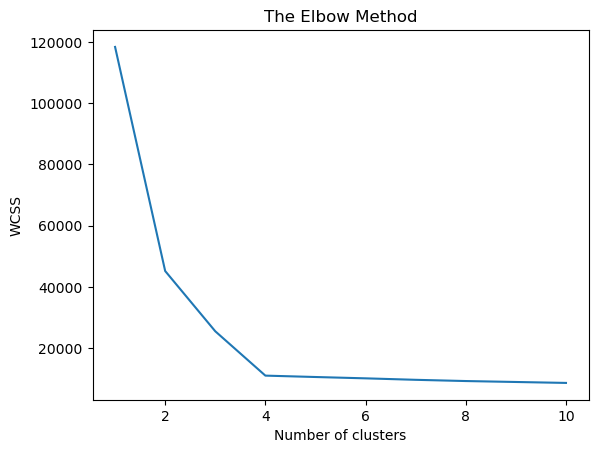

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the above plot, we will selcet `4` as number of clusters

In [9]:
# Training the algorithm

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)
np.unique(y_kmeans)

array([0, 1, 2, 3])

In [10]:
# selecting two columns for visualization purpose

X = df.iloc[:,[0,1]].values # first and second columns
X1 = df.iloc[:,[1,2]].values # second and third columns
X2 = df.iloc[:,[2,3]].values # third and fourth columns

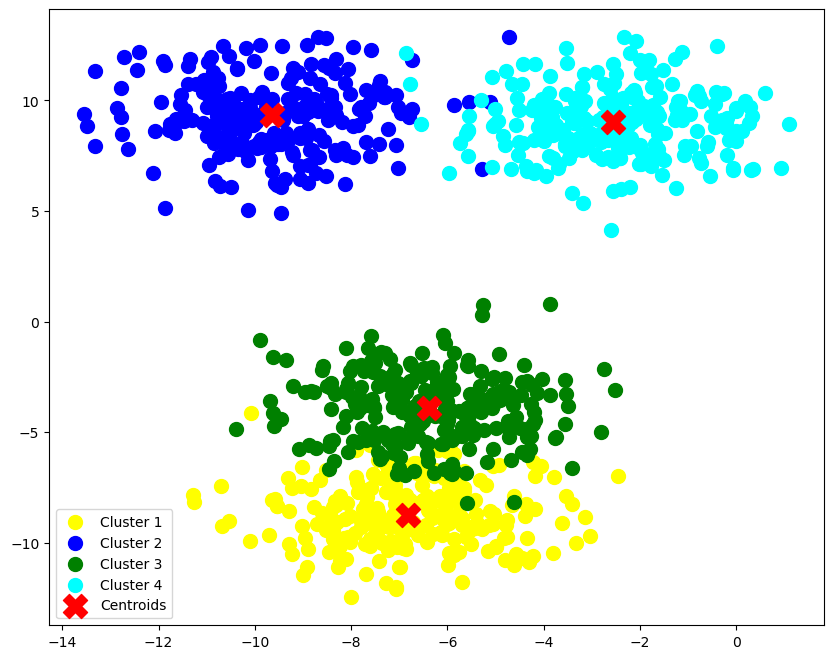

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s = 300, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

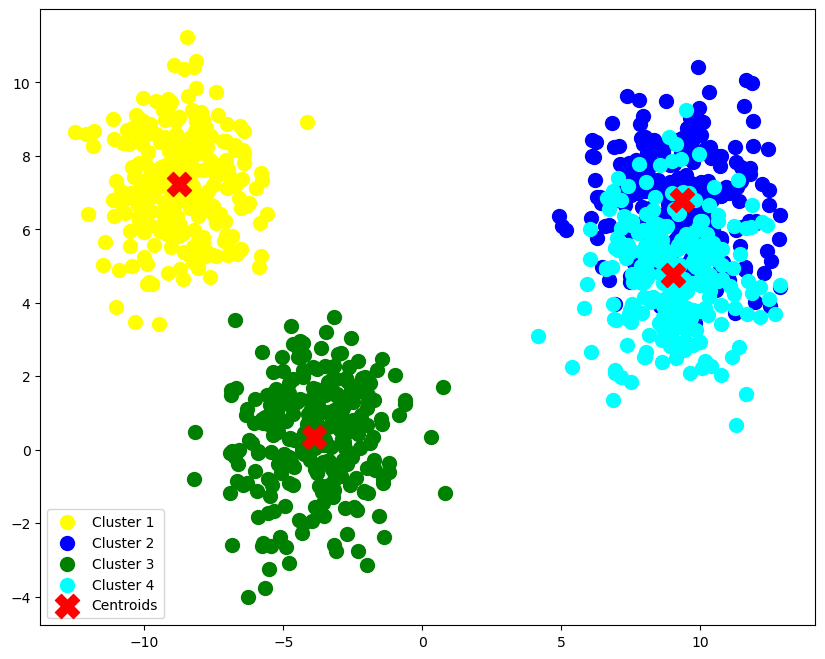

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker="X", s = 300, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

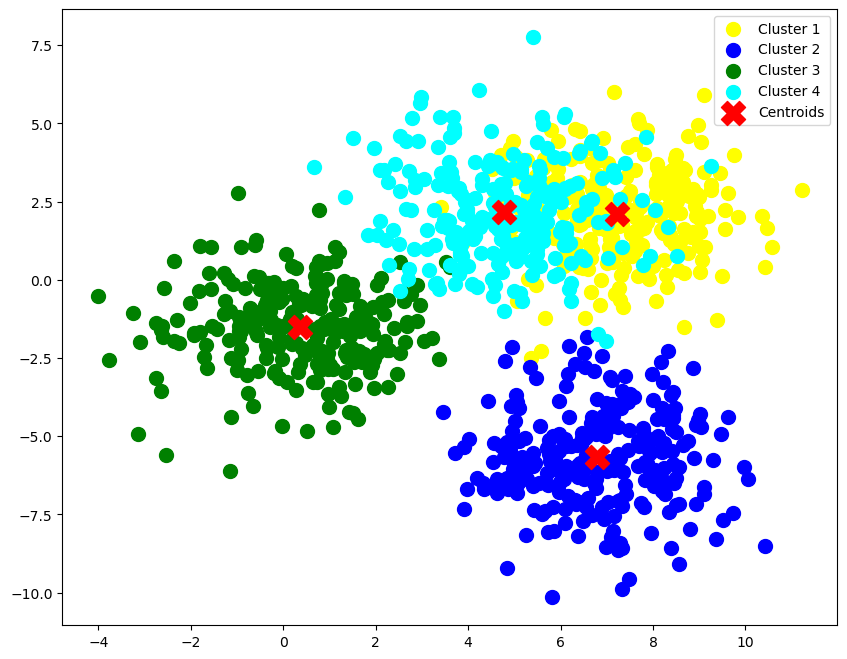

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker="X", s = 300, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

**Note: Selecting the number of clusters with silhouette analysis on KMeans clustering**

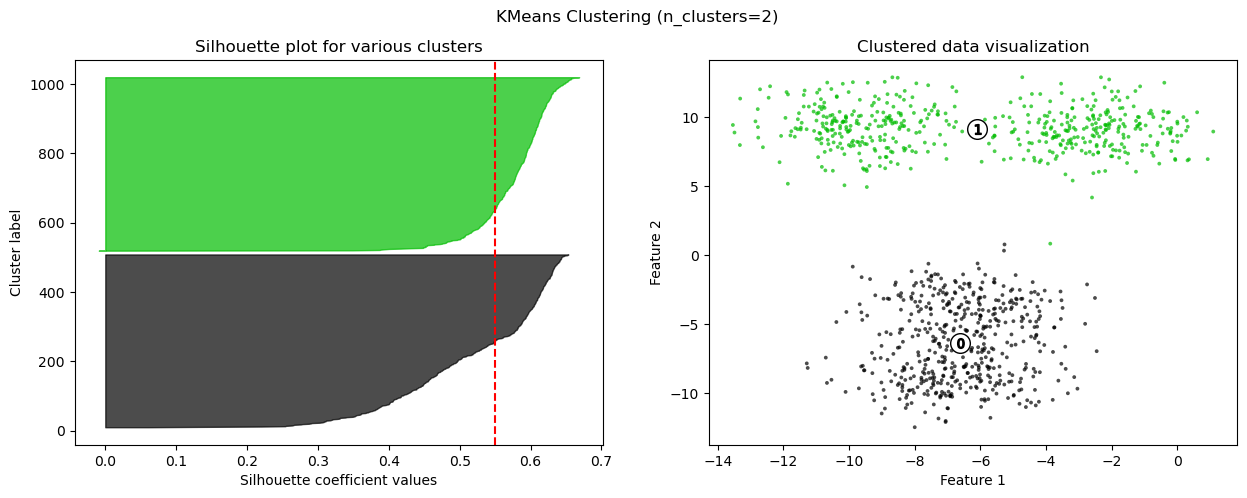

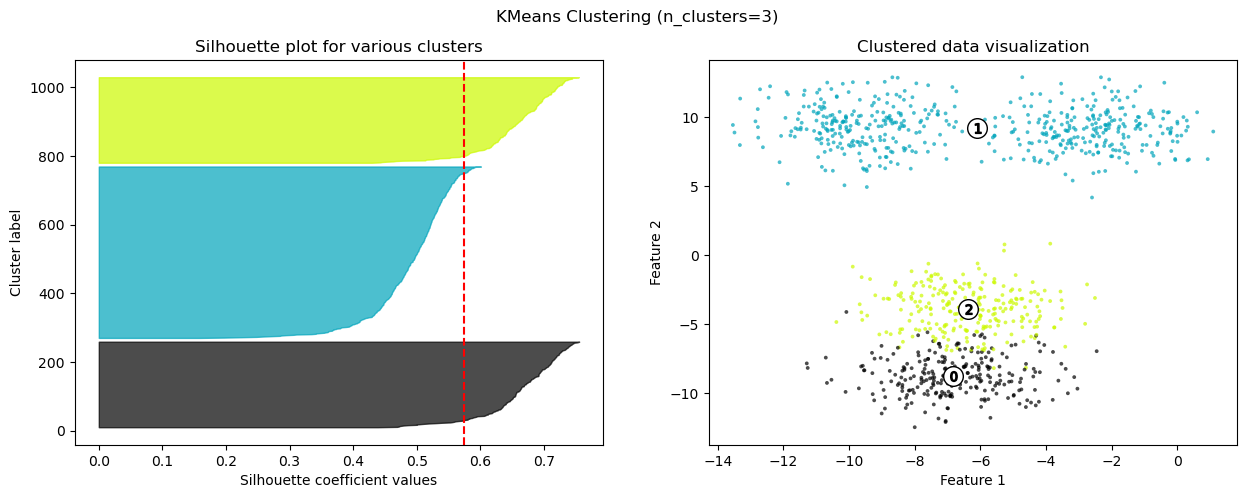

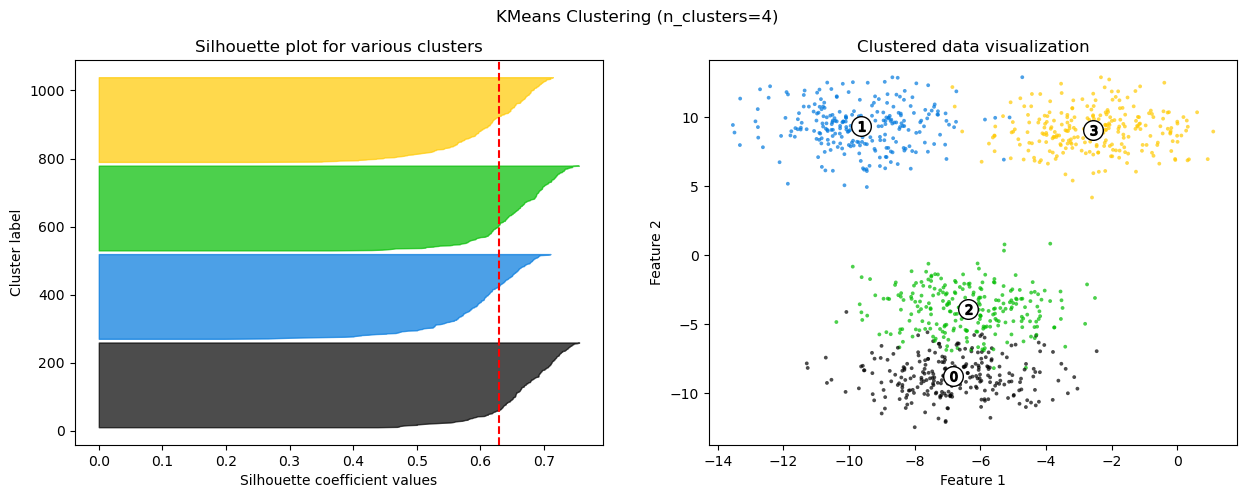

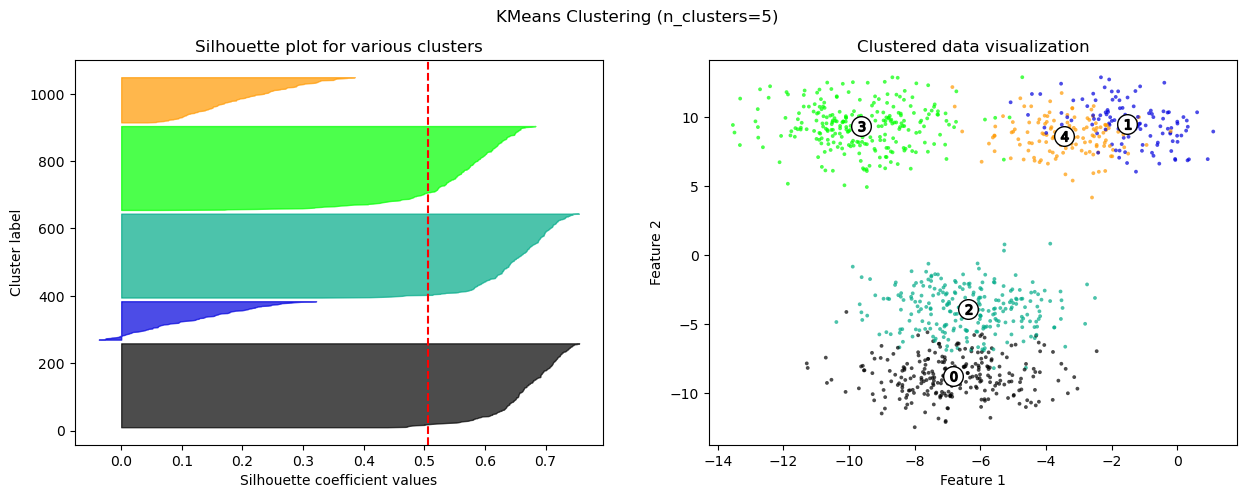

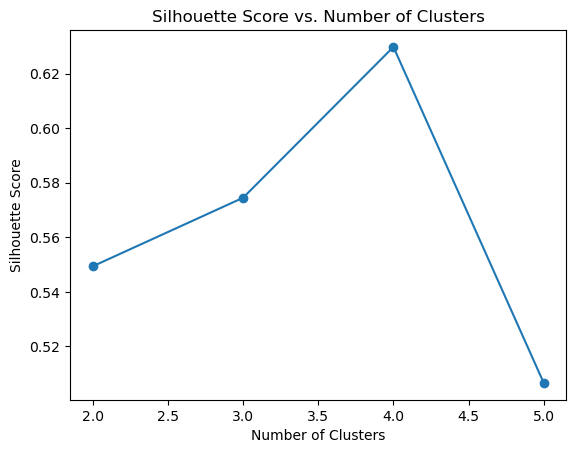

In [14]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 6)

# Store silhouette scores for each cluster
silhouette_scores = []

# Visualize the data and clusters for each cluster number
for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'KMeans Clustering (n_clusters={n_clusters})')

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # print("For n_clusters =", n_clusters,
    #       "The average silhouette_score is :", silhouette_avg)

    # Plot silhouette values for each sample (optional)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Visualize clustered data
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Plot cluster centers
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clustered data visualization")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.show()

# Plot the silhouette scores for different cluster numbers
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Model Training `Hierarchical clustering`

In hierarchical clustering, we will use dendrograms to select number of clusters

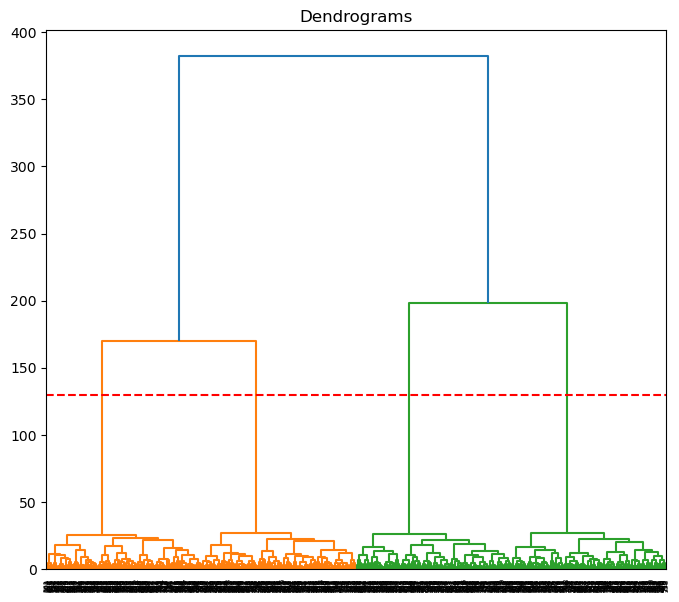

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=130, color='r', linestyle='--')

I am going to try 2,4 as number of clusters

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 3, 3, 1, 1, 2, 1, 3, 0, 2, 1, 2, 1, 2, 2, 0, 3, 3, 1, 1, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 3, 2, 1, 2, 0, 1, 2,
       3, 0, 1, 3, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0,
       3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 0, 0, 3, 2, 3, 2, 1, 3, 2, 0,
       3, 0, 1, 3, 0, 1, 3, 3, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 2, 2, 0, 0, 3, 1, 3, 3, 1, 3, 3, 1, 0, 2, 3, 2, 1, 3, 1, 0, 1,
       0, 2, 3, 3, 1, 3, 3, 0, 1, 2, 2, 0, 3, 0, 2, 0, 2, 1, 3, 0, 3, 3,
       0, 0, 2, 1, 3, 1, 2, 3, 1, 3, 2, 2, 0, 2, 3, 3, 2, 1, 2, 1, 3, 1,
       3, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 3, 0, 1, 0, 3, 3,
       1, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 0, 3, 1, 3, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 1, 3, 2, 1, 2, 0, 3, 3, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 3, 0, 0, 0, 2, 3, 3, 1, 1, 0, 2,
       2, 0, 3, 1, 3, 0, 1, 0, 3, 2, 3, 2, 1, 3, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 3, 0, 2, 1,

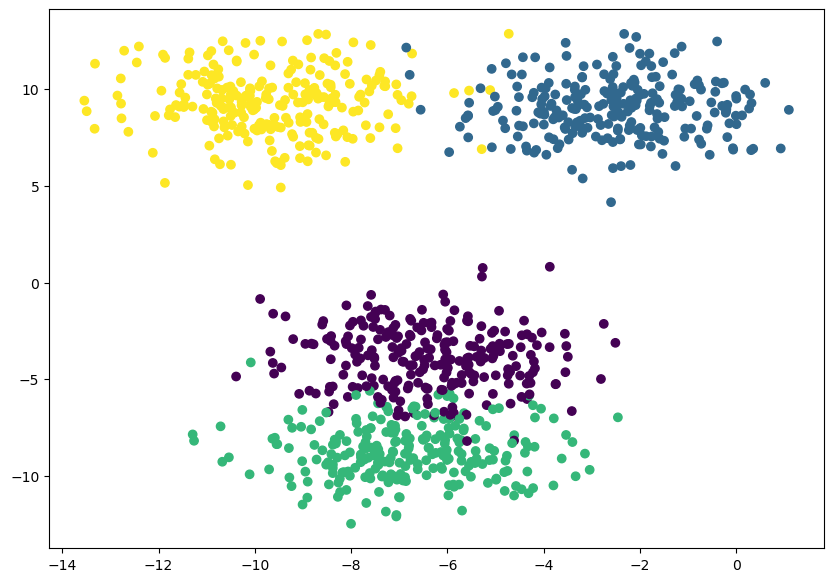

In [17]:
# ploting first and second columns

plt.figure(figsize=(10, 7))  
plt.scatter(df[0], df[1], c=cluster.labels_) 

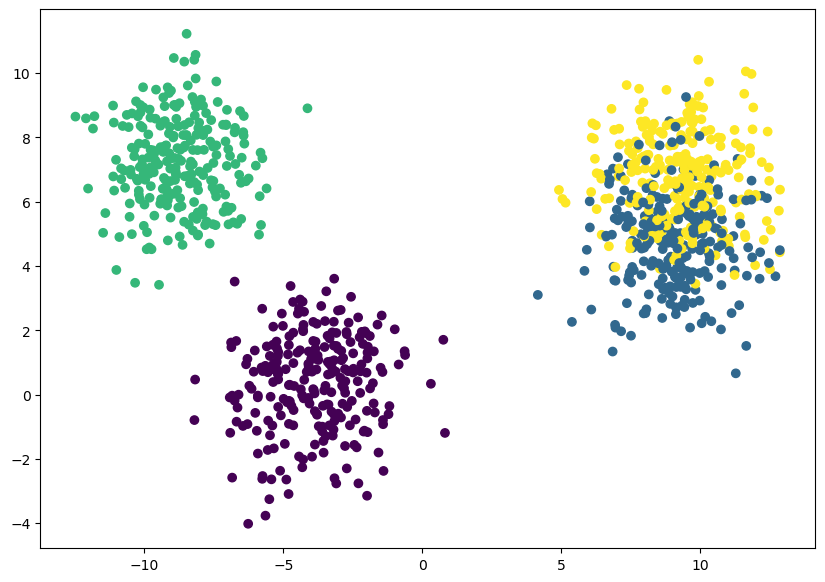

In [18]:
# ploting second and third columns

plt.figure(figsize=(10, 7))  
plt.scatter(df[1], df[2], c=cluster.labels_) 

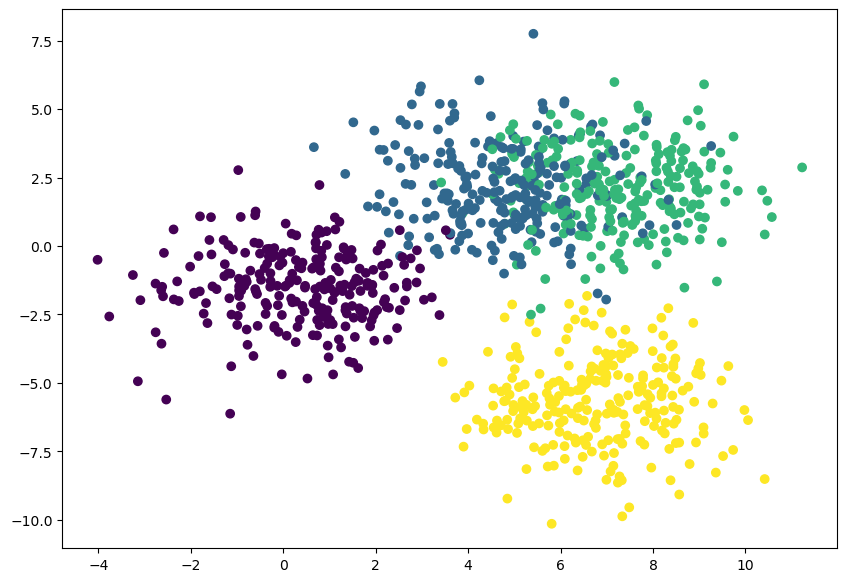

In [19]:
# ploting third and fourth columns

plt.figure(figsize=(10, 7))  
plt.scatter(df[2], df[3], c=cluster.labels_) 